In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

currentDir = os.getcwd()
currentFileCSV2021 = currentDir +"\\" + "stat2021.csv"
# csvFileObj = open(currentFileCSV)
stat2021 = pd.read_csv(currentFileCSV2021)
currentFileCSV2021f = currentDir +"\\" + "fullstat2021.csv"
stat2021f = pd.read_csv(currentFileCSV2021f)

def f_z_norm(data):
    mean = np.mean(data)
    std = np.std(data)
    z_norm = [(y-mean)/std for y in data]
    return z_norm

stat2021f.head()

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB.1
0,Arizona Diamondbacks,64,28.9,4.19,162,6144,5489,679,1297,308,...,6270,82,4.88,1.436,9.4,1.5,3.5,7.9,2.23,1146
1,Atlanta Braves,56,28.2,4.91,161,6056,5363,790,1307,269,...,5944,115,4.09,1.243,7.9,1.2,3.3,9.0,2.75,1074
2,Baltimore Orioles,62,26.7,4.07,162,5983,5420,659,1296,266,...,6252,78,5.15,1.484,9.7,1.7,3.6,7.9,2.19,1103
3,Boston Red Sox,56,28.0,5.12,162,6122,5495,829,1434,330,...,6147,110,3.95,1.378,8.9,1.1,3.5,9.7,2.80,1163
4,Chicago Cubs,69,29.1,4.35,162,5972,5306,705,1255,225,...,6202,88,4.88,1.403,8.8,1.5,3.8,8.7,2.28,1143


In [104]:
# stat2021['z_Bat'] = f_z_norm(stat2021['Bat']) 
# stat2021['z_Pitch'] = f_z_norm(stat2021['Pitch'])
# stat2021['z_W'] = f_z_norm(stat2021['W'])
# stat2021['z_W-L%'] = f_z_norm(stat2021['W-L%'])

stat2021f['z_R/G'] = f_z_norm(stat2021f['R/G']) 
stat2021f['z_RA/G'] = f_z_norm(stat2021f['RA/G'])
stat2021f['z_W'] = f_z_norm(stat2021f['W'])
stat2021f['z_W-L%'] = f_z_norm(stat2021f['W-L%'])

stat2021f.head()

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,H9,HR9,BB9,SO9,SO/W,LOB.1,z_R/G,z_RA/G,z_W,z_W-L%
0,Arizona Diamondbacks,64,28.9,4.19,162,6144,5489,679,1297,308,...,9.4,1.5,3.5,7.9,2.23,1146,-0.799136,1.760262,-2.036246,-2.039700
1,Atlanta Braves,56,28.2,4.91,161,6056,5363,790,1307,269,...,7.9,1.2,3.3,9.0,2.75,1074,0.888189,-0.827126,0.494416,0.535564
2,Baltimore Orioles,62,26.7,4.07,162,5983,5420,659,1296,266,...,9.7,1.7,3.6,7.9,2.19,1103,-1.080356,2.461013,-2.036246,-2.039700
3,Boston Red Sox,56,28.0,5.12,162,6122,5495,829,1434,330,...,8.9,1.1,3.5,9.7,2.80,1163,1.380325,0.161113,0.775601,0.774858
4,Chicago Cubs,69,29.1,4.35,162,5972,5306,705,1255,225,...,8.8,1.5,3.8,8.7,2.28,1143,-0.424175,1.167319,-0.700619,-0.706488


In [141]:
l = stat2021f[0:0].T
rt_label = []
rt_val = []
# chk_range = [1,2,3,4,5,6,7,8,12,13,14]
for i in range(1,len(l)):
    # print(l.index[i])
    df = pd.DataFrame([stat2021f['z_W-L%'],stat2021f[l.index[i]]]).T
    corr = df.corr(method = 'pearson')
    # print(corr)
    # print(corr.iloc[1,0])
    rt_label.append(l.index[i])
    rt_val.append(corr.iloc[1,0])
    print( l.index[i] , round(corr.iloc[1,0],3))


#Bat -0.208
BatAge 0.322
R/G 0.764
G -0.011
PA 0.538
AB 0.221
R 0.766
H 0.33
2B 0.165
3B -0.209
HR 0.707
RBI 0.759
SB -0.057
CS -0.248
BB 0.583
SO -0.026
BA 0.324
OBP 0.586
SLG 0.633
OPS 0.651
OPS+ 0.625
TB 0.599
GDP -0.073
HBP 0.31
SH -0.172
SF 0.365
IBB 0.236
LOB 0.247
#P -0.133
PAge 0.298
RA/G -0.885
W 1.0
L -1.0
W-L% 1.0
ERA -0.888
G.1 -0.011
GS -0.011
GF -0.19
CG 0.199
tSho 0.783
cSho 0.092
SV 0.807
IP 0.614
H.1 -0.77
R.1 -0.885
ER -0.872
HR.1 -0.741
BB.1 -0.491
IBB.1 -0.09
SO.1 0.668
HBP.1 -0.275
BK 0.295
WP 0.016
BF -0.555
ERA+ 0.867
FIP -0.877
WHIP -0.835
H9 -0.821
HR9 -0.78
BB9 -0.521
SO9 0.593
SO/W 0.73
LOB.1 -0.269
z_R/G 0.764
z_RA/G -0.885
z_W 1.0
z_W-L% 1.0


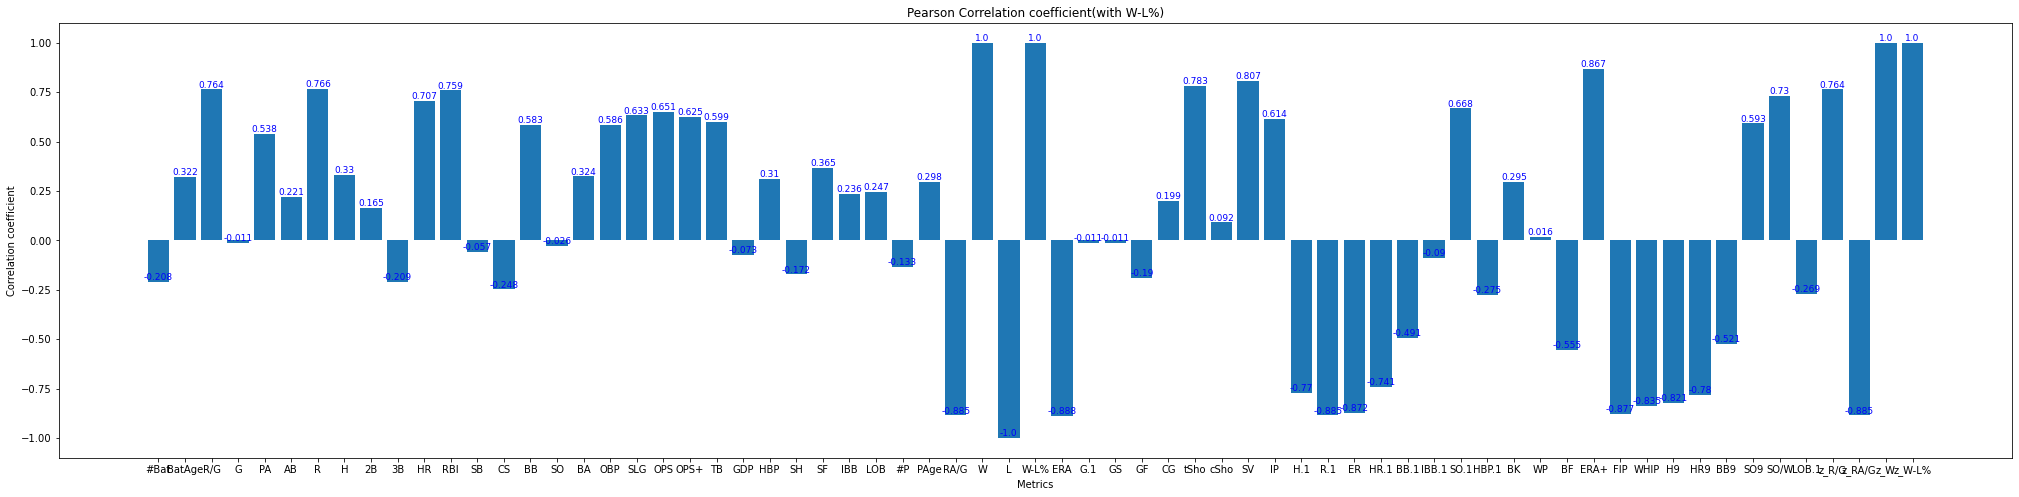

In [142]:
plt.figure(figsize=(35,8))
plt.bar(rt_label,rt_val)
# plt.legend(rt_label)
# plt.legend(['10',r'$10^0$',r'$\frac{1}{10}$',r'$\frac{1}{100}$',r'$\frac{1}{1000}$',r'$\frac{1}{10000}$',r'$\frac{1}{100000}$',r'$\frac{1}{1000000}$'])
plt.xlabel('Metrics')
plt.ylabel('Correlation coefficient')
plt.title('Pearson Correlation coefficient(with W-L%)')

for i, v in enumerate(rt_label):
    plt.text(v, rt_val[i], str(round(rt_val[i],3)),
             fontsize=9,
             color="blue",
             horizontalalignment='center',
             verticalalignment='bottom')

plt.show()

